In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import argparse
import torch
import cv2 as cv
import logging
from pkg_resources import parse_requirements

from exp_runner import Runner

In [2]:
def plot_cameras(poses, scale=0.5):
    camera_centers = poses[:, :3, 3]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Cartesian axes
    ax.quiver(0, 0, 0, 1, 0, 0, length=scale*2, color='r')
    ax.quiver(0, 0, 0, 0, 1, 0, length=scale*2,color='g')
    ax.quiver(0, 0, 0, 0, 0, 1, length=scale*2,color='b')
    ax.text(0, 0, 0, 'w')

    for i, T_c_0 in enumerate(poses):
        ax.quiver(T_c_0[0, 3], T_c_0[1, 3], T_c_0[2, 3], T_c_0[0, 0], T_c_0[1, 0], T_c_0[2, 0], length=scale, color='r')
        ax.quiver(T_c_0[0, 3], T_c_0[1, 3], T_c_0[2, 3], T_c_0[0, 1], T_c_0[1, 1], T_c_0[2, 1], length=scale, color='g')
        ax.quiver(T_c_0[0, 3], T_c_0[1, 3], T_c_0[2, 3], T_c_0[0, 2], T_c_0[1, 2], T_c_0[2, 2], length=scale, color='b')
        ax.text(T_c_0[0, 3], T_c_0[1, 3], T_c_0[2, 3], str(i))

    axis_min_lim = np.min(camera_centers)
    axis_max_lim = np.max(camera_centers)
    ax.set_xlim([axis_min_lim, axis_max_lim])
    ax.set_ylim([axis_min_lim, axis_max_lim])
    ax.set_zlim([axis_min_lim, axis_max_lim])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

DTU

In [16]:
parser = argparse.ArgumentParser()
parser.add_argument('--dataset_type', type=str, default='dtu')
parser.add_argument('--conf', type=str, default='./confs/womask.conf')
parser.add_argument('--case', type=str, default='')
parser.add_argument('--mode', type=str, default='validate_mesh')
parser.add_argument('--is_continue', default=False, action="store_true")

args = parser.parse_args(["--dataset_type", "dtu", "--case", "dtu_scan65"])

runner = Runner(args.conf, args.dataset_type, args.mode, args.case, args.is_continue)

images = runner.dataset.images
masks = runner.dataset.masks
poses = runner.dataset.pose_all

print('Loaded dtu')
print("images shape:", images.shape, "device:", images.device)
print("masks shape:", masks.shape, "device:", masks.device)
print("poses shape:", poses.shape, "device:", poses.device)
print("focal val:", runner.dataset.focal.item(), "device:", runner.dataset.focal.device)

poses = poses.cpu().numpy()

Load data: Begin
Load data: End
Loaded dtu
images shape: torch.Size([49, 1200, 1600, 3]) device: cpu
masks shape: torch.Size([49, 1200, 1600, 3]) device: cpu
poses shape: torch.Size([49, 4, 4]) device: cuda:0
focal val: 2892.330322265625 device: cuda:0


In [4]:
@widgets.interact(idx=(0, len(images)-1))
def show_img(idx):
    print(poses[idx])
    # img = cv.cvtColor(images[idx], cv.COLOR_BGR2RGB)
    plt.imshow(images[idx])

interactive(children=(IntSlider(value=24, description='idx', max=48), Output()), _dom_classes=('widget-interac…

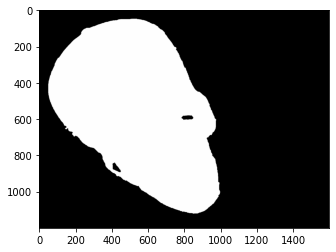

In [5]:
plt.imshow(masks[0])

In [6]:
print(torch.min(masks[0]), torch.max(masks[0]))

tensor(0.) tensor(0.9961)


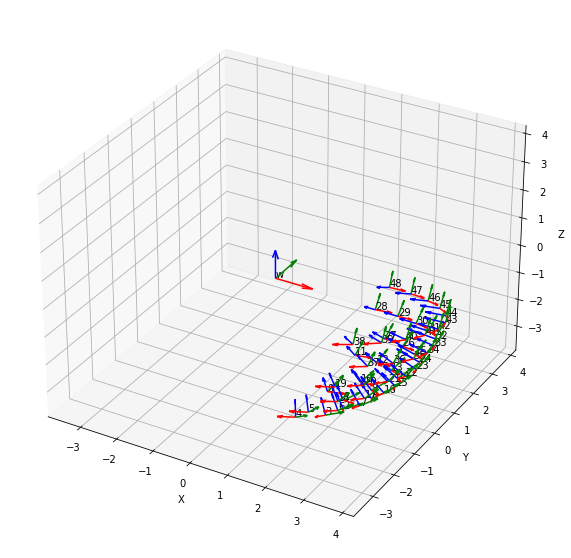

In [7]:
plot_cameras(poses, scale=0.5)

NeRF Synthetic

In [14]:
parser = argparse.ArgumentParser()
parser.add_argument('--dataset_type', type=str, default='dtu')
parser.add_argument('--conf', type=str, default='./confs/womask.conf')
parser.add_argument('--case', type=str, default='')
parser.add_argument('--mode', type=str, default='validate_mesh')
parser.add_argument('--is_continue', default=False, action="store_true")

args = parser.parse_args(["--dataset_type", "blender", "--case", "lego"])

runner = Runner(args.conf, args.dataset_type, args.mode, args.case, args.is_continue)

images = runner.dataset.images
masks = runner.dataset.masks
poses = runner.dataset.pose_all

print('Loaded dtu')
print("images shape:", images.shape, "device:", images.device)
print("masks shape:", masks.shape, "device:", masks.device)
print("poses shape:", poses.shape, "device:", poses.device)
print("focal val:", runner.dataset.focal.item(), "device:", runner.dataset.focal.device)

poses = poses.cpu().numpy()

Load data: Begin
Load data: End
Loaded dtu
images shape: torch.Size([100, 800, 800, 3]) device: cpu
masks shape: torch.Size([100, 800, 800, 1]) device: cpu
poses shape: torch.Size([100, 4, 4]) device: cuda:0
focal val: 1111.1110311937682 device: cuda:0


In [15]:
print(runner.dataset.intrinsics_all[0])
print(runner.dataset.intrinsics_all_inv[0])
print(np.lingalg.inv(runner.dataset.intrinsics_all[0]))

AttributeError: 'BlenderDataset' object has no attribute 'intrinsics_all'

In [9]:
@widgets.interact(idx=(0, len(images)-1))
def show_img(idx):
    print(poses[idx])
    # img = cv.cvtColor(images[idx], cv.COLOR_BGR2RGB)
    plt.imshow(images[idx])
    # plt.imshow(masks[idx])

interactive(children=(IntSlider(value=49, description='idx', max=99), Output()), _dom_classes=('widget-interac…

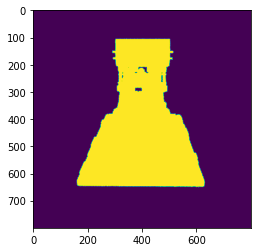

In [10]:
plt.imshow(masks[0])

In [11]:
print(torch.min(masks[0]), torch.max(masks[0]))

tensor(0.) tensor(1.)


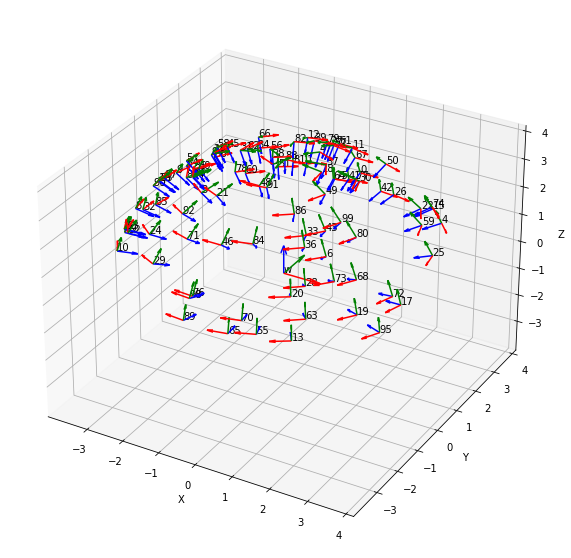

In [12]:
plot_cameras(poses, scale=0.5)

In [13]:
# from load_blender import load_blender_data

# # Load data
# if args.dataset_type == 'blender':
#     images, poses, render_poses, hwf, i_split = load_blender_data(args.datadir, args.half_res, args.testskip)
#     i_train, i_val, i_test = i_split

#     near = 2.
#     far = 6.

#     if args.white_bkgd:
#         images = images[...,:3]*images[...,-1:] + (1.-images[...,-1:])
#     else:
#         images = images[...,:3]
    
#     print('Loaded blender')
#     print("images", images.shape)
#     print("poses", poses.shape)
#     print("render_poses", render_poses.shape)
#     print("hwf", hwf)
#     print("datadir", args.datadir)
#     print('Train val test sizes', len(i_train), len(i_val), len(i_test))
#     print('Near far', near, far)

In [ ]:
# @widgets.interact(idx=(0, len(images)-1))
# def show_img(idx):
#     print(poses[idx])
#     plt.imshow(images[idx])

interactive(children=(IntSlider(value=68, description='idx', max=137), Output()), _dom_classes=('widget-intera…

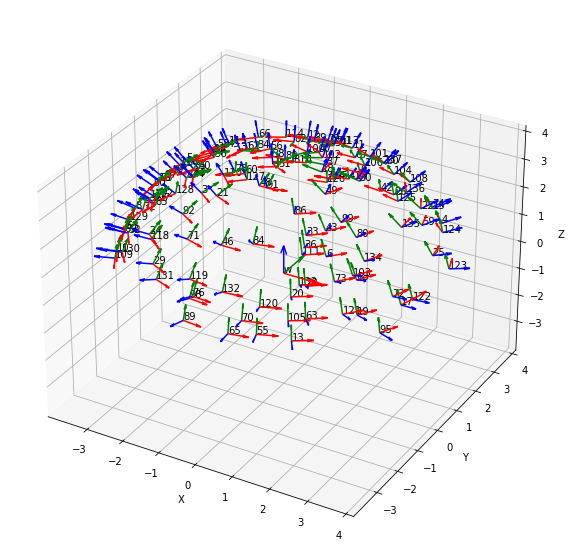

In [ ]:
# plot_cameras(poses, scale=0.5)